In [41]:
%matplotlib inline

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import f_oneway, f

import statsmodels.api as sm
from statsmodels.formula.api import ols 

import warnings
warnings.simplefilter('ignore')


from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.decomposition import PCA

In [16]:
pl = pd.read_csv('C:/Users/doris/Documents/data_analytics/Final_Project/kmean_nba/nba_extra.csv')

In [17]:
pl
#Metodo jerarquico modelos no supervisados - cluster

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Alex Abrines\abrinal01,SG,24,OKC,75,8,1134,115,291,...,0.848,26,88,114,28,38,8,25,124,353
1,2,Quincy Acy\acyqu01,PF,27,BRK,70,8,1359,130,365,...,0.817,40,217,257,57,33,29,60,149,411
2,3,Steven Adams\adamsst01,C,24,OKC,76,76,2487,448,712,...,0.559,384,301,685,88,92,78,128,215,1056
3,4,Bam Adebayo\adebaba01,C,20,MIA,69,19,1368,174,340,...,0.721,118,263,381,101,32,41,66,138,477
4,5,Arron Afflalo\afflaar01,SG,32,ORL,53,3,682,65,162,...,0.846,4,62,66,30,4,9,21,56,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,537,Tyler Zeller\zellety01,C,28,BRK,42,33,703,125,229,...,0.667,63,131,194,28,8,21,35,78,300
660,537,Tyler Zeller\zellety01,C,28,MIL,24,1,406,62,105,...,0.895,47,64,111,19,7,14,12,48,141
661,538,Paul Zipser\zipsepa01,SF,23,CHI,54,12,824,81,234,...,0.760,13,118,131,46,20,15,43,86,218
662,539,Ante Zizic\zizican01,C,21,CLE,32,2,214,49,67,...,0.724,24,36,60,5,2,13,11,30,119


In [18]:
pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      664 non-null    int64  
 1   Player  664 non-null    object 
 2   Pos     664 non-null    object 
 3   Age     664 non-null    int64  
 4   Tm      664 non-null    object 
 5   G       664 non-null    int64  
 6   GS      664 non-null    int64  
 7   MP      664 non-null    int64  
 8   FG      664 non-null    int64  
 9   FGA     664 non-null    int64  
 10  FG%     660 non-null    float64
 11  3P      664 non-null    int64  
 12  3PA     664 non-null    int64  
 13  3P%     599 non-null    float64
 14  2P      664 non-null    int64  
 15  2PA     664 non-null    int64  
 16  2P%     646 non-null    float64
 17  eFG%    660 non-null    float64
 18  FT      664 non-null    int64  
 19  FTA     664 non-null    int64  
 20  FT%     606 non-null    float64
 21  ORB     664 non-null    int64  
 22  DR

In [19]:
pl.isnull().sum()

Rk         0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        4
3P         0
3PA        0
3P%       65
2P         0
2PA        0
2P%       18
eFG%       4
FT         0
FTA        0
FT%       58
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

In [20]:
pl = pl.dropna()

In [25]:
cols = [col for col in pl.columns.values if col not in ['Rk', 'Pos', 'Age', 'Player', 'Tm']]
print(len(cols), cols)

25 ['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


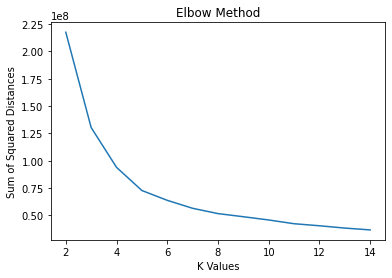

In [26]:
# Elbow Method - Funciona para identificar el número de posibles clusters

K = range(2, 15)
sum_squared_distances = []

for k in K:
    model = KMeans(n_clusters=k).fit(pl[cols])
    sum_squared_distances.append(model.inertia_)

plt.plot(K, sum_squared_distances)
plt.xlabel('K Values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')

plt.show()

In [39]:
kmeans = KMeans(n_clusters=4, random_state=False)

NBA_clusters = kmeans.fit(pl[cols])
labels = NBA_clusters.labels_
labels

array([0, 0, 1, 0, 2, 3, 0, 2, 2, 1, 2, 1, 0, 3, 3, 0, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 1, 3, 3, 1, 0, 0, 1, 3, 2, 1, 1, 0, 2, 0, 2, 1, 0,
       2, 2, 0, 0, 2, 2, 3, 2, 1, 2, 1, 1, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2,
       0, 2, 2, 0, 2, 1, 2, 2, 1, 2, 2, 2, 1, 0, 0, 1, 2, 2, 2, 0, 1, 2,
       2, 1, 1, 0, 0, 2, 2, 1, 2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 2, 2, 1, 0,
       2, 1, 2, 0, 2, 2, 1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 0, 2, 1, 0, 3, 0,
       0, 0, 0, 2, 3, 0, 1, 0, 2, 2, 3, 3, 2, 1, 3, 2, 1, 3, 0, 0, 2, 2,
       2, 1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 2, 0, 1, 1, 2, 2, 2, 2, 2, 2, 0,
       3, 1, 0, 3, 2, 1, 0, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       3, 0, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 1, 0, 1, 0, 2, 2, 2, 3, 1, 2, 1, 2, 1, 0, 2, 1, 2,
       3, 0, 2, 1, 0, 1, 0, 2, 1, 2, 1, 1, 2, 0, 0, 2, 2, 2, 1, 0, 0, 3,
       2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 0, 2, 2, 1, 1, 0, 3, 2, 2, 2, 2, 2,
       2, 0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2,

In [43]:
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(pl[cols])
plot_columns

array([[-163.48131683, -265.05695141],
       [ 107.30792758, -336.18451494],
       [1657.45148068,  -81.9953854 ],
       ...,
       [-898.43756101,   53.25096032],
       [-475.3487858 , -126.5265812 ],
       [-869.05905119,   83.88569921]])

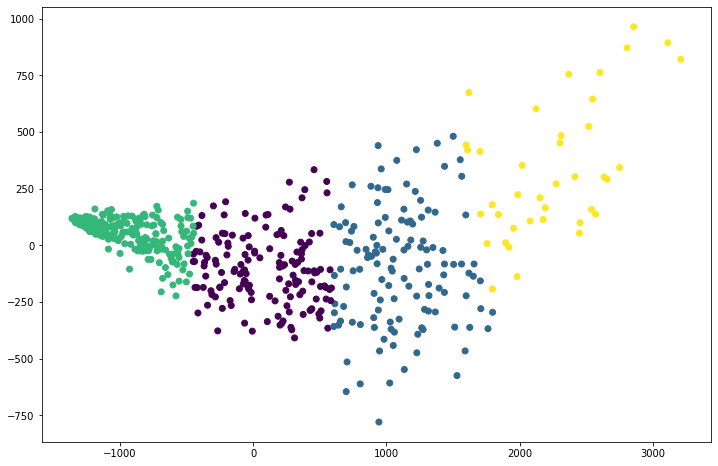

In [48]:
plt.figure(figsize=(12,8))
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
#plt.scatter(NBA_clusters.cluster_centers_[:,0], NBA_clusters.cluster_centers_[:,1])
plt.show()

In [59]:
predict = NBA_clusters.fit_predict(pl[cols])

In [60]:
pl['cluster_kmeans_1'] = predict
pl.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,cluster_kmeans_1
0,1,Alex Abrines\abrinal01,SG,24,OKC,75,8,1134,115,291,...,26,88,114,28,38,8,25,124,353,0
1,2,Quincy Acy\acyqu01,PF,27,BRK,70,8,1359,130,365,...,40,217,257,57,33,29,60,149,411,0
2,3,Steven Adams\adamsst01,C,24,OKC,76,76,2487,448,712,...,384,301,685,88,92,78,128,215,1056,1
3,4,Bam Adebayo\adebaba01,C,20,MIA,69,19,1368,174,340,...,118,263,381,101,32,41,66,138,477,0
4,5,Arron Afflalo\afflaar01,SG,32,ORL,53,3,682,65,162,...,4,62,66,30,4,9,21,56,179,2


In [61]:
cluster_0  = pl[pl['cluster_kmeans_1'] == 0]
cluster_0.head(15)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,cluster_kmeans_1
0,1,Alex Abrines\abrinal01,SG,24,OKC,75,8,1134,115,291,...,26,88,114,28,38,8,25,124,353,0
1,2,Quincy Acy\acyqu01,PF,27,BRK,70,8,1359,130,365,...,40,217,257,57,33,29,60,149,411,0
3,4,Bam Adebayo\adebaba01,C,20,MIA,69,19,1368,174,340,...,118,263,381,101,32,41,66,138,477,0
7,8,Jarrett Allen\allenja01,C,19,BRK,72,31,1441,234,397,...,144,244,388,49,28,88,82,147,587,0
13,14,Ryan Anderson\anderry01,PF,29,HOU,66,50,1725,207,480,...,94,237,331,60,24,21,42,126,617,0
17,18,OG Anunoby\anunoog01,SF,20,TOR,74,62,1481,163,346,...,44,140,184,55,52,14,45,130,438,0
37,34,Jerryd Bayless\bayleje01,SG,29,PHI,39,11,925,109,262,...,15,65,80,54,23,6,46,91,307,0
38,35,Aron Baynes\baynear01,C,31,BOS,81,67,1485,210,446,...,130,304,434,93,22,51,80,200,482,0
44,40,Marco Belinelli\belinma01,SG,31,ATL,52,1,1210,199,485,...,14,86,100,103,46,3,54,41,591,0
46,41,Jordan Bell\belljo01,C,23,GSW,57,13,809,116,185,...,60,147,207,102,35,56,51,92,262,0


In [62]:
cluster_1  = pl[pl['cluster_kmeans_1'] == 1]
cluster_1.head(15)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,cluster_kmeans_1
2,3,Steven Adams\adamsst01,C,24,OKC,76,76,2487,448,712,...,384,301,685,88,92,78,128,215,1056,1
10,11,Al-Farouq Aminu\aminual01,PF,27,POR,69,67,2072,230,582,...,97,428,525,84,79,40,79,136,644,1
12,13,Kyle Anderson\anderky01,SF,24,SAS,74,67,1978,231,438,...,84,312,396,202,115,60,94,114,585,1
19,20,Trevor Ariza\arizatr01,SF,32,HOU,67,67,2269,268,651,...,33,261,294,105,98,13,52,132,782,1
25,24,D.J. Augustin\augusdj01,PG,30,ORL,75,36,1760,244,540,...,30,130,160,287,54,0,123,94,766,1
32,29,Lonzo Ball\balllo01,PG,20,LAL,52,50,1780,203,564,...,69,291,360,376,88,43,136,117,528,1
33,30,J.J. Barea\bareajo01,PG,33,DAL,69,10,1603,303,690,...,15,186,201,434,35,3,143,83,801,1
36,33,Nicolas Batum\batumni01,SG,29,CHO,64,64,1981,270,650,...,57,249,306,349,65,23,131,72,740,1
39,36,Kent Bazemore\bazemke01,SG,28,ATL,65,65,1789,284,676,...,25,223,248,228,100,45,157,147,836,1
42,39,Michael Beasley\beaslmi01,PF,29,NYK,74,30,1653,409,807,...,97,317,414,123,36,43,143,145,976,1


In [73]:
cluster_2  = pl[pl['cluster_kmeans_1'] == 2]
cluster_2.head(20)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,cluster_kmeans_1
4,5,Arron Afflalo\afflaar01,SG,32,ORL,53,3,682,65,162,...,4,62,66,30,4,9,21,56,179,2
8,9,Kadeem Allen\allenka01,PG,25,BOS,18,1,107,6,22,...,4,7,11,12,3,2,9,15,19,2
9,10,Tony Allen\allento01,SF,36,NOP,22,0,273,44,91,...,20,27,47,9,11,3,19,49,103,2
11,12,Justin Anderson\anderju01,SF,24,PHI,38,0,519,87,202,...,25,68,93,25,15,7,16,54,236,2
18,19,Ryan Arcidiacono\arcidry01,PG,23,CHI,24,0,304,17,41,...,1,24,25,35,13,0,13,18,48,2
20,21,Darrell Arthur\arthuda01,PF,29,DEN,19,1,141,22,47,...,3,12,15,9,8,3,15,22,54,2
21,22,Jamel Artis\artisja01,SG,25,ORL,15,1,279,31,79,...,4,34,38,18,2,3,8,11,77,2
26,25,Luke Babbitt\babbilu01,SF,28,TOT,50,14,715,91,215,...,7,89,96,31,8,7,19,54,259,2
27,25,Luke Babbitt\babbilu01,SF,28,ATL,37,9,570,80,168,...,5,76,81,26,7,5,15,47,226,2
29,26,Dwayne Bacon\bacondw01,SG,22,CHO,53,6,713,72,192,...,4,120,124,38,16,2,23,46,175,2


In [77]:
cluster_3  = pl[pl['cluster_kmeans_1'] == 3]
cluster_3.head(25)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,cluster_kmeans_1
6,7,LaMarcus Aldridge\aldrila01,C,32,SAS,75,75,2509,687,1347,...,246,389,635,152,43,90,111,161,1735,3
15,16,Giannis Antetokounmpo\antetgi01,PF,23,MIL,75,75,2756,742,1402,...,156,597,753,361,109,106,223,231,2014,3
16,17,Carmelo Anthony\anthoca01,PF,33,OKC,78,78,2501,472,1168,...,67,386,453,103,47,49,99,197,1261,3
34,31,Harrison Barnes\barneha02,PF,25,DAL,77,77,2634,537,1208,...,77,391,468,152,49,14,118,94,1452,3
35,32,Will Barton\bartowi01,SG,27,DEN,81,40,2683,465,1028,...,70,339,409,331,82,52,149,168,1268,3
40,37,Bradley Beal\bealbr01,SG,24,WAS,82,82,2977,683,1484,...,61,302,363,373,96,36,214,160,1857,3
57,52,Eric Bledsoe\bledser01,PG,28,TOT,74,74,2322,468,989,...,51,233,284,370,149,42,216,185,1313,3
148,122,Anthony Davis\davisan02,PF,24,NOP,75,75,2727,780,1462,...,187,645,832,174,115,193,162,159,2110,3
156,130,DeMar DeRozan\derozde01,SG,28,TOR,80,80,2711,645,1413,...,59,256,315,417,85,22,175,151,1840,3
164,138,Goran Dragic\dragigo01,PG,31,MIA,75,75,2378,484,1075,...,54,253,307,359,63,12,166,180,1296,3


In [51]:
Russell_Westbrook = pl[cols].loc[pl['Player'] == 'Russell Westbrook\westbru01', :]
Russell_Westbrook 

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
625,80,80,2914,757,1687,0.449,97,326,0.298,660,...,0.737,152,652,804,820,147,20,381,200,2028


In [52]:
Russell_Westbrook_list = Russell_Westbrook.values.tolist()
NBA_clusters.predict(Russell_Westbrook_list)

array([3])

In [53]:
Lebron_James = pl[cols].loc[pl['Player'] == 'LeBron James\jamesle01', :]
Lebron_James

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
303,82,82,3026,857,1580,0.542,149,406,0.367,708,...,0.731,97,612,709,747,116,71,347,136,2251


In [54]:
Lebron_James_list = Lebron_James.values.tolist()
NBA_clusters.predict(Lebron_James_list)

array([3])

In [ ]:
#Lebron james y Russell westbrook tienen las mismas caracteristicas de juego

In [75]:
James_Harden = pl[cols].loc[pl['Player'] == 'James Harden\hardeja01', :]
James_Harden

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
232,72,72,2551,651,1449,0.449,265,722,0.367,386,...,0.858,41,348,389,630,126,50,315,169,2191


In [76]:
James_Harden_list = James_Harden.values.tolist()
NBA_clusters.predict(James_Harden_list)

array([3])

In [84]:
Jrue_Holiday = pl[cols].loc[pl['Player'] == 'Jrue Holiday\holidjr01', :]
Jrue_Holiday

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
269,81,81,2927,615,1244,0.494,120,356,0.337,495,...,0.786,62,303,365,486,123,64,213,201,1537


In [85]:
Jrue_Holiday_list = Jrue_Holiday.values.tolist()
NBA_clusters.predict(Jrue_Holiday_list)

array([3])